**Abstract**

* The purpose of this notebook is to perform charecter recognition on TMINST (94 charecter) dataset. 

* The TMNIST dataset is a collection of handwritten character images similar to the well-known MNIST dataset, but with a twist. Instead of using standard fonts, the TMNIST dataset uses various typefaces to create a more challenging and diverse dataset for machine learning applications.

* The dataset contains a total of 62 classes, including 10 digits, 26 uppercase letters, and 26 lowercase letters. Each class contains 1,000 images, resulting in a total of 62,000 images. The images are grayscale and have a resolution of 28x28 pixels, similar to the MNIST dataset.

* The TMNIST dataset is useful for researchers and practitioners who are interested in exploring the performance of different machine learning algorithms on a more diverse and challenging dataset. It can also be used as a benchmark dataset for character recognition tasks, and as a training set for developing new neural network architectures such as convolutional neural networks (CNNs) and recurrent neural networks (RNNs).

* The dataset can be accessed on the Kaggle platform, which is a popular online community for data science and machine learning practitioners. The dataset is provided in the form of CSV files, which can be easily imported into various machine learning frameworks such as TensorFlow, PyTorch, and Scikit-learn.

* We will be training and testing our model on the Typeface MNIST Dataset, which consists of over 29,000 samples of images of 0-9 digits in various fonts along with their labels.

In [1]:
# import all the require libraries
import numpy as np 
import pandas as pd 
import re

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf 
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Reading Data
#data = pd.read_csv('/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv')
#data.head()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd "/content/drive/My Drive/Kaggle"

/content/drive/My Drive/Kaggle


The column 'labels' tells us about the digit represented and the columns 1-784 represent the pixel information stored in out 28x28 (784 pixels) images.

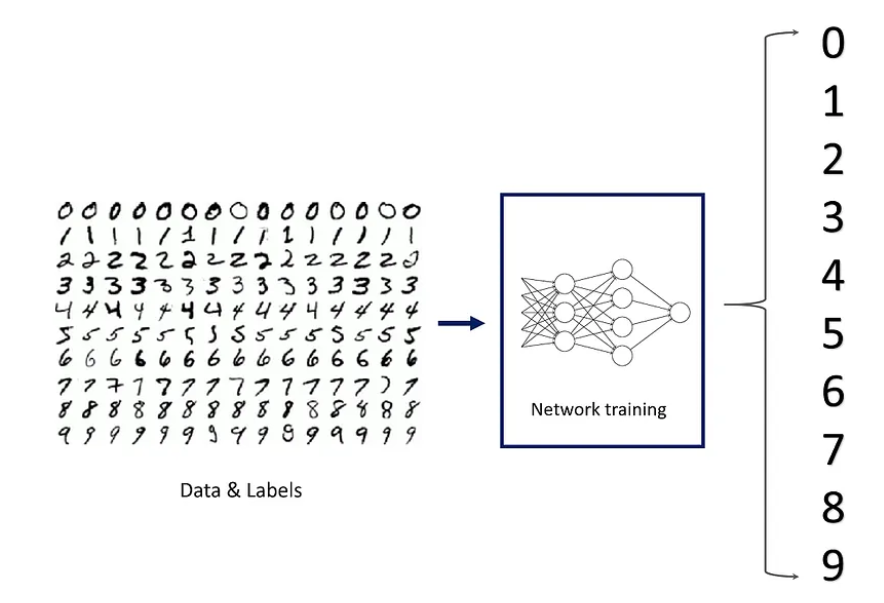

In [5]:
data = pd.read_csv("94_character_TMNIST.csv")
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Below is the observation made to find the number of labels and number of images associated with each label

In [6]:
labels_count = data.labels.value_counts()
print(labels_count)

6    2990
2    2990
7    2990
5    2990
4    2990
     ... 
E    2874
g    2874
V    2874
b    2874
`    2848
Name: labels, Length: 94, dtype: int64


**Compiling**

With the below code, creating a non-optimized empty CNN. Now it is time to set an optimizer with a given loss function that uses a metric. Then, we can fit the model by using our train data.

In [7]:
# Extracts a list of unique labels from the labels column of the data dataframe.
all_ = list(data['labels'].unique())

# Regex Pattern to check alphabets, digits and special symbols
pattern_uc = re.compile(r"[A-Z]")
pattern_lc = re.compile(r"[a-z]")
pattern_numbers = re.compile(r"[0-9]")
pattern_symbols = re.compile(r"[\W]|[\_\,]")

# Extracting Pattern
lower_case = pattern_lc.findall(str(all_))
Upper_case = pattern_uc.findall(str(all_))
Numbers_ = pattern_numbers.findall(str(all_))
Symbols_ = list(set(pattern_symbols.findall(str(all_))))
Symbols_.pop(27)

# Creating Gropus
group = 1
for list_ in (lower_case,Upper_case,Numbers_,Symbols_):
    data.loc[data['labels'].isin(list_), 'group'] = str(group)
    group += 1

We observe that the labels are equally distributed with 2990 instances of each class. Hence, our dataset is balanced.

Now, let us reshape and modify our data so that it can be used as an input for our model. We normalise the data and reshape it into a 4 dimensional array such that it represents images stacked on to each other. We also reshape our labels into a 1 dimensional array.

In [8]:
# defining X and y for training
X = data.iloc[:, 2:-1].astype('float32') 
y = data[['labels']]

**Data Preparation**

* Extracts the unique values in the 'labels' column of the DataFrame y and assigns them to the variable labels.

* Creates a list of integer values that correspond to the unique labels in the DataFrame y. The length of the list is equal to the number of unique labels.

* Creates a dictionary where the keys are the unique labels in the 'labels' column of the DataFrame y, and the values are the corresponding integer values from the values list. This dictionary can be used to map the unique labels to their corresponding integer values.

* Creates a second dictionary where the keys are the integer values from the values list, and the values are the corresponding unique labels from the 'labels' column of the DataFrame y. This dictionary can be used to map the integer values back to their original labels.

* By converting the categorical labels into numeric values, the models can better process and analyze the data.

In [9]:
# Preparing the data to create dictionary
labels = y['labels'].unique()
values = [num for num in range(len(data['labels'].unique()))]
label_dict= dict(zip(labels,values)) #Creating Dictionary 
label_dict_inv = dict(zip(values,labels))

In [10]:
# Mapping values
y['labels'].replace(label_dict, inplace=True)

In [11]:
# Checking the key value pairs
print(label_dict)

{'6': 0, 'D': 1, 'f': 2, '/': 3, 'F': 4, 'x': 5, 'J': 6, '8': 7, 'H': 8, 'k': 9, '@': 10, '1': 11, '=': 12, 'g': 13, ')': 14, '2': 15, 'd': 16, '^': 17, '3': 18, 't': 19, '#': 20, '.': 21, '4': 22, 'o': 23, '"': 24, 'y': 25, 'A': 26, 'u': 27, 'G': 28, '-': 29, 'm': 30, 'W': 31, '&': 32, 'c': 33, '9': 34, 'N': 35, ']': 36, 'P': 37, 'X': 38, '|': 39, '}': 40, 'h': 41, '7': 42, 'j': 43, '5': 44, '>': 45, '?': 46, 'b': 47, '*': 48, 'w': 49, 'l': 50, '0': 51, '$': 52, 'I': 53, 'Y': 54, '%': 55, ':': 56, 'T': 57, 'K': 58, 'E': 59, '<': 60, 'V': 61, '{': 62, 'M': 63, 'S': 64, 'a': 65, 'i': 66, 'r': 67, "'": 68, 'p': 69, ';': 70, '[': 71, '+': 72, 'e': 73, 'U': 74, '(': 75, 's': 76, '~': 77, ',': 78, 'C': 79, 'q': 80, '_': 81, 'n': 82, 'B': 83, 'z': 84, 'v': 85, 'O': 86, 'R': 87, '`': 88, 'Z': 89, 'Q': 90, 'L': 91, '!': 92, '\\': 93}


**Splitting X and Y**

Spliting the data into training and testing sets using an 80:20 proportion.


In [12]:
# creating test train split of 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

We have now split the dataset into X and y, which are predictor and targets. X contains 784 columns of pixels of the images and y contains the labels of the correspoding images.

In [13]:
# preping the inputs for training
Length, Height = 28,28
NCl = y_train.nunique()[0] # Unique targets

# N of images 28x28
X_train = np.reshape(X_train.values, (X_train.shape[0] ,Length, Height)) 
X_test = np.reshape(X_test.values, (X_test.shape[0] ,Length, Height))

# Target into Categorical Values
y_train = to_categorical(y_train, NCl, dtype='int' )
y_test = to_categorical(y_test, NCl, dtype='int' )

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(219274, 28, 28),(54819, 28, 28)
Y:Train, Test data shape:(219274, 94),(54819, 94)


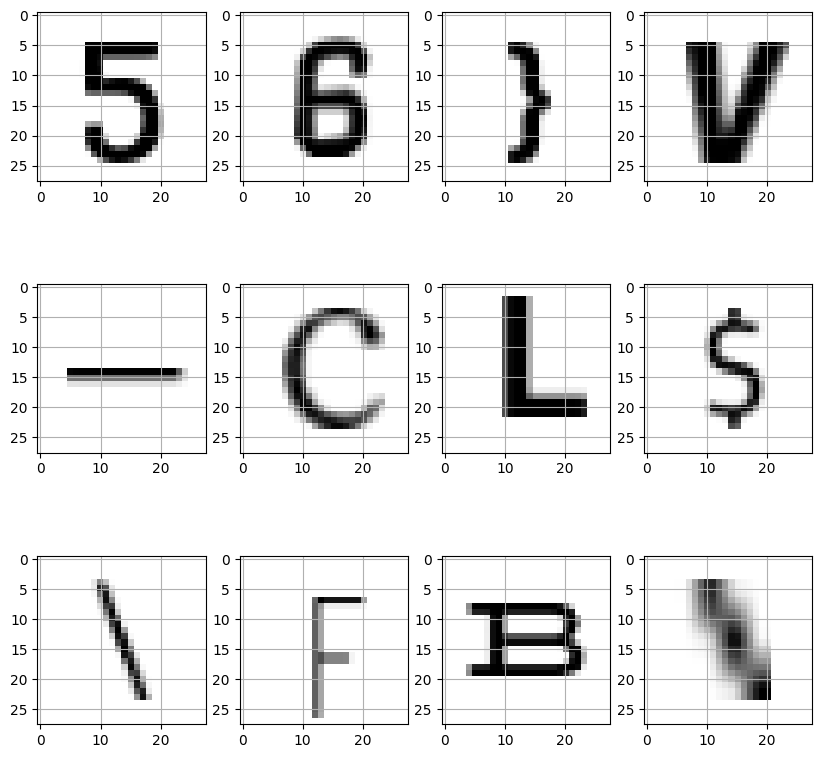

In [14]:
# Displaying the characters
random = shuffle(X_train[:500]) 
fig,ax = plt.subplots(3,4 , figsize = (10,10)) 
axes = ax.flatten()
for i in range(12):
    img = np.reshape(random[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img, cmap="gray_r")
    img_final =np.reshape(img, (1,28,28,1)) # reshaping it for passing into model for prediction
    axes[i].grid()

## Neural Network

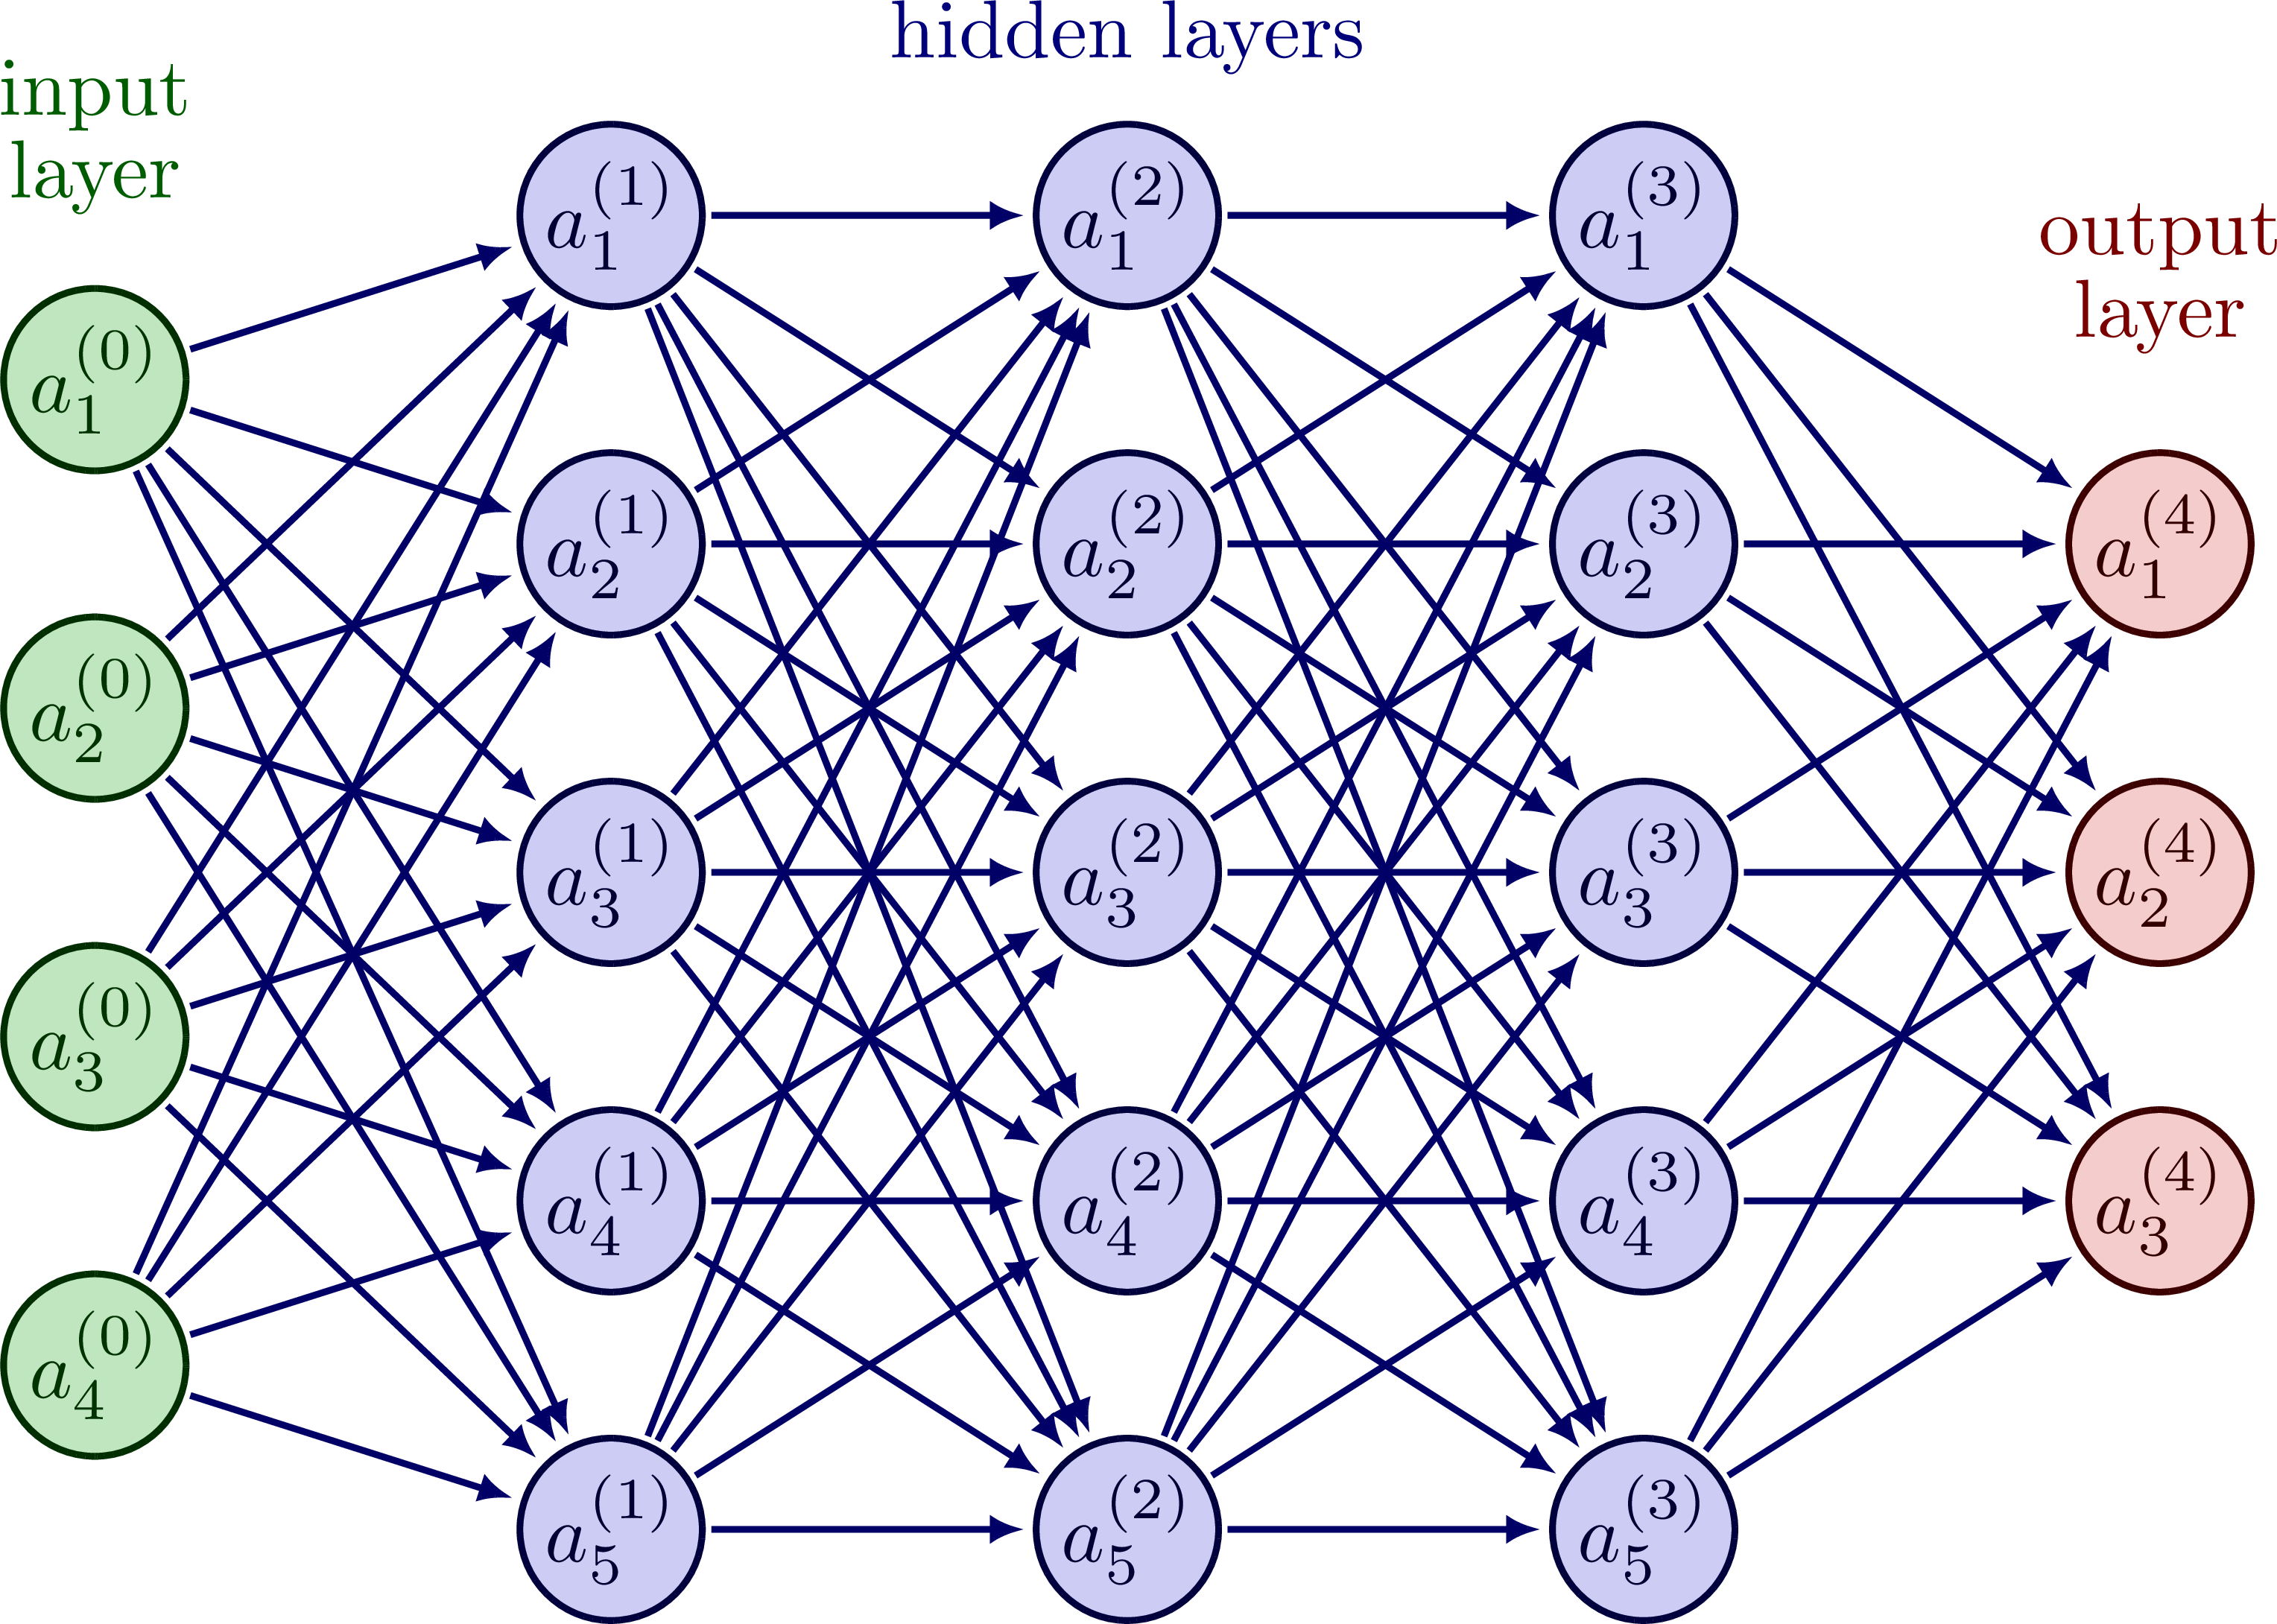

In [15]:
# importing libraries for building neural netwrok
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
RGB = 1  # In this case only one instead of 3 because we dont have Color images
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2], RGB)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],RGB)

#normalizing the image data
X_train = X_train/255
X_test = X_test/255
print(f'Train, Test shapes: {X_train.shape},{X_test.shape}')

Train, Test shapes: (219274, 28, 28, 1),(54819, 28, 28, 1)


**Building the Convolutional Neural Network**

We will build our model by using high-level Keras API which uses either TensorFlow or Theano on the backend. I would like to mention that there are several high-level TensorFlow APIs such as Layers, Keras, and Estimators which helps us create neural networks with high-level knowledge. However, this may lead to confusion since they all vary in their implementation structure. Therefore, if you see completely different codes for the same neural network although they all use TensorFlow, this is why. I will use the most straightforward API which is Keras. Therefore, I will import the Sequential Model from Keras and add Conv2D, MaxPooling, Flatten, Dropout, and Dense layers. I have already talked about Conv2D, Maxpooling, and Dense layers. In addition, Dropout layers fight with the overfitting by disregarding some of the neurons while training while Flatten layers flatten 2D arrays to 1D arrays before building the fully connected layers.

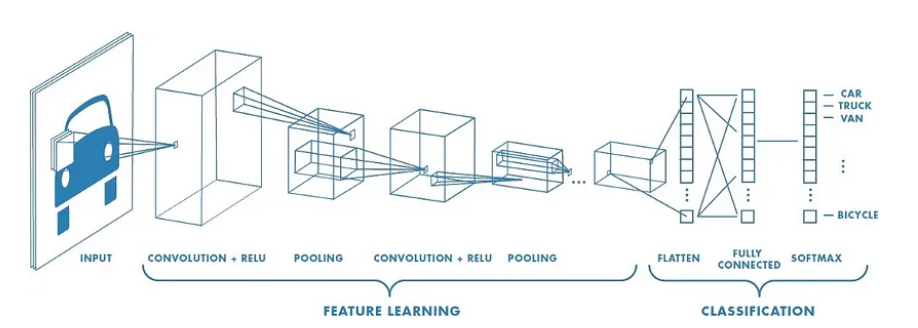

In [17]:
model = Sequential ()

# 4 Conv with Maxpool and Dropout [25%] -> Flatten - >  Dense -> Dense -> Output 
model.add(Conv2D(filters = 32 , kernel_size = (3,3),input_shape = (Length, Height, RGB), padding = 'same',))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(350))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(NCl, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        1

In [18]:
# Defining parameters for training
optimizer  = Adam(learning_rate=0.01)
callback = EarlyStopping(monitor='loss', patience=5)

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [19]:
# Training the model
seq_model = model.fit(X_train,y_train, validation_data = (X_test,y_test), batch_size = 10, epochs = 5, verbose = 1)

Epoch 1/5
21928/21928 [==============================] - 1206s 55ms/step - loss: 0.7597 - accuracy: 0.7919 - val_loss: 0.3377 - val_accuracy: 0.9050
Epoch 2/5
21928/21928 [==============================] - 1172s 53ms/step - loss: 0.5274 - accuracy: 0.8563 - val_loss: 0.2895 - val_accuracy: 0.9175
Epoch 3/5
21928/21928 [==============================] - 1184s 54ms/step - loss: 0.4957 - accuracy: 0.8669 - val_loss: 0.2775 - val_accuracy: 0.9203
Epoch 4/5
21928/21928 [==============================] - 1156s 53ms/step - loss: 0.4866 - accuracy: 0.8711 - val_loss: 0.2795 - val_accuracy: 0.9221
Epoch 5/5
21928/21928 [==============================] - 1166s 53ms/step - loss: 0.4785 - accuracy: 0.8741 - val_loss: 0.2863 - val_accuracy: 0.9228


In [20]:
# Evaluation
score = model.evaluate(X_test, y_test, batch_size = 10,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")

Test Accuracy:92.28%


**Conclusion**

The above TMNIST(Typeface MNIST) dataset is available on kaggle, on which we have performed CNN for digit classification.


Prepared the data for CNN by normalizing and reshaping the data.
We also did one hot encoding on the lables and extracted encoded hot vectors for each labels.
Built our CNN model with required convolution layers , maxpooling, flatten, full connection and regularization like dropout and earlystopping.
Achieved a good accuracy of 93% on the model and also visualized the accuracy and loss of the model.

**Licences:**

MIT License


Copyright (c) 2023 Rohit Kanithi


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:


The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.


THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE